In [1]:
%pylab inline
import sys
sys.path.insert(0, '../modules')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from hits import AllHits
hits = AllHits('../data/signal_TDR.root')

### Determine the maximum and minimum signal hit times

In [3]:
min_sig_hit_time = 10000000000000
max_sig_hit_time = -1000000000000
for evt in range(hits.n_events):
    hit_times = hits.get_measurement(evt, "CdcCell_tstart") % 1170
    sig_wires = hits.get_sig_wires(evt)
    this_time = min(hit_times[sig_wires])
    if this_time < min_sig_hit_time:
        min_sig_hit_time = this_time
    this_time = max(hit_times[sig_wires])
    if this_time > max_sig_hit_time:
        max_sig_hit_time = this_time
print "Minimum hit time of signal hit w.r.t. proton bunch fire = {}".format(min_sig_hit_time)
print "Maximum hit time of signal hit w.r.t. proton bunch fire = {}".format(max_sig_hit_time)

Minimum hit time of signal hit w.r.t. proton bunch fire = 0.014955507088
Maximum hit time of signal hit w.r.t. proton bunch fire = 1169.98847203


### Plot the distributions

In [5]:
sig_time = np.zeros(0)
bkg_time = np.zeros(0)

sig_diff_time = np.zeros(0)
bck_diff_time = np.zeros(0)

for evt in range(hits.n_events):
    hit_times = hits.get_measurement(evt, "CdcCell_tstart")
    trig_times = hits.get_trigger_time(evt)
    sig_wires = hits.get_sig_wires(evt)
    bkg_wires = hits.get_bkg_wires(evt)
    sig_times_in_event = (hit_times[sig_wires]-hits.get_trigger_time(evt)[sig_wires])%1170
    bck_times_in_event = (hit_times[bkg_wires]-hits.get_trigger_time(evt)[bkg_wires])%1170
    sig_time = np.append(sig_time, sig_times_in_event)
    bkg_time = np.append(bkg_time, bck_times_in_event)
    
    hit_diff = hit_times[:-1] - hit_times[1:]

    sig_diff_time = np.append(sig_diff_time, hit_diff[numpy.intersect1d(sig_wires, sig_wires - 1)])
    bck_diff_time = np.append(bck_diff_time, hit_diff[numpy.intersect1d(bkg_wires, bkg_wires - 1)])
    

### Comparing difference between neighboring signal wires and arbitrary signal wires 

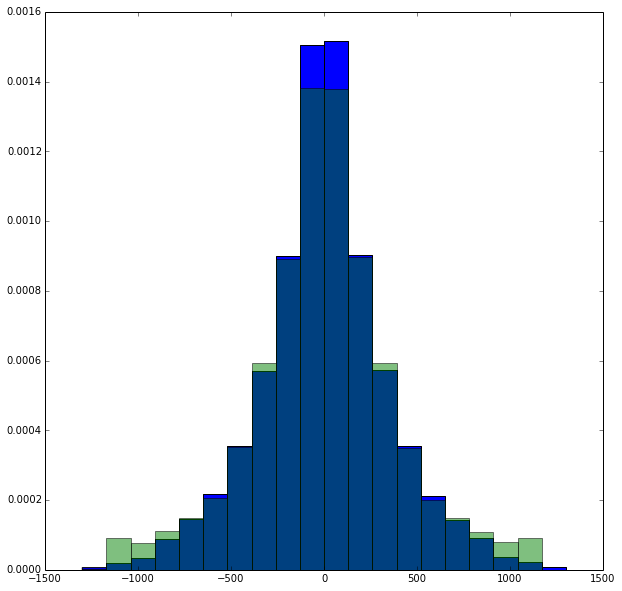

In [9]:
hist(sig_diff_time, range=[-1300, 1300], normed=True, bins=20)
# hist(bck_diff_time, alpha=0.1)
hist(sig_time[:-200] - sig_time[200:], alpha=0.5, range=[-1300, 1300], normed=True, bins=20)
show()

### Distibution of signal hits timing with resepct to trigger timing

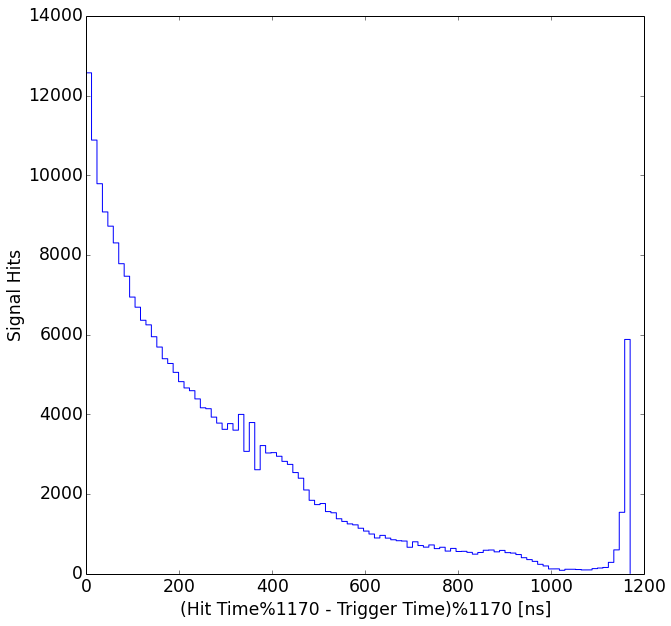

In [7]:
figsize(10,10)
plt.xticks(fontsize ='xx-large')
plt.yticks(fontsize ='xx-large') 
plt.xlabel('(Hit Time%1170 - Trigger Time)%1170 [ns]' , fontsize='xx-large')
plt.ylabel('Signal Hits', fontsize='xx-large')
plt.hist(sig_time,bins=100,histtype='step')
show()

### Distribution of background hit timing with resepct to trigger hit

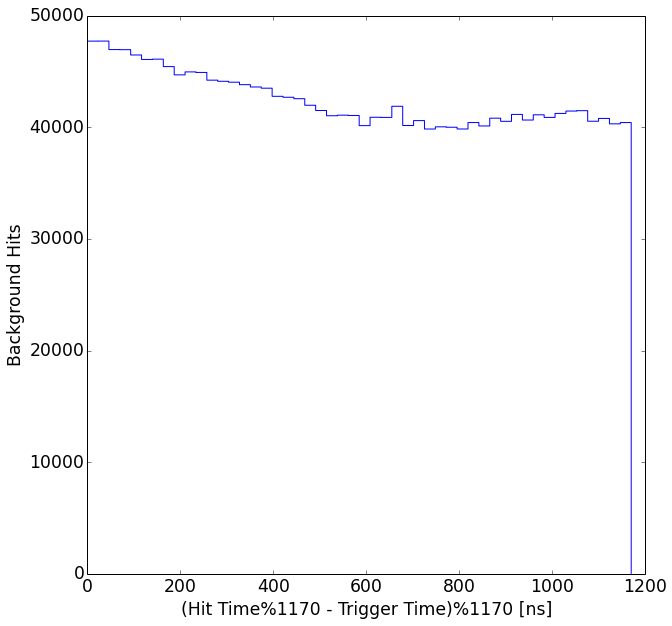

In [8]:
figsize(10,10)
plt.xticks(fontsize ='xx-large')
plt.yticks(fontsize ='xx-large') 
plt.xlabel('(Hit Time%1170 - Trigger Time)%1170 [ns]' , fontsize='xx-large')
plt.ylabel('Background Hits', fontsize='xx-large')
plt.hist(bkg_time,bins=50,histtype='step')
show()